In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Datasets/force2020_data.csv',index_col = False)

In [7]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [9]:
data.shape

(18270, 6)

In [11]:
data.isnull()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,False,True,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
18265,False,False,False,False,True,True
18266,False,False,False,False,True,True
18267,False,False,False,False,True,True
18268,False,False,False,False,True,True


In [13]:
data.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [17]:
duplicated_rows = data.duplicated()
print(duplicated_rows.sum())

0


<Axes: >

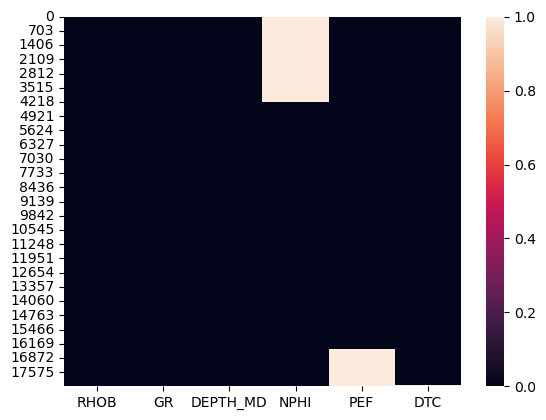

In [23]:
sns.heatmap(data.isna())

Dropping rows with missing values

In [26]:
data = data.dropna()

In [28]:
data.isnull().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [30]:
data.shape

(12202, 6)

In [34]:
data.describe() #summary statistics

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


Histograms

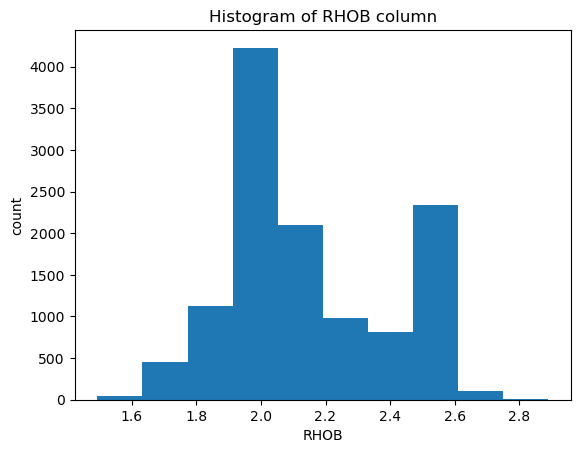

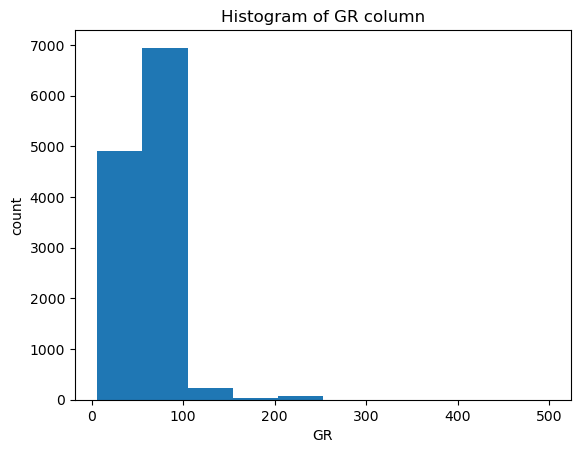

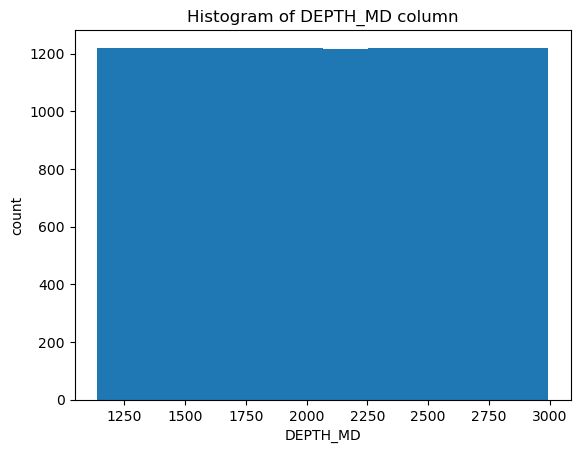

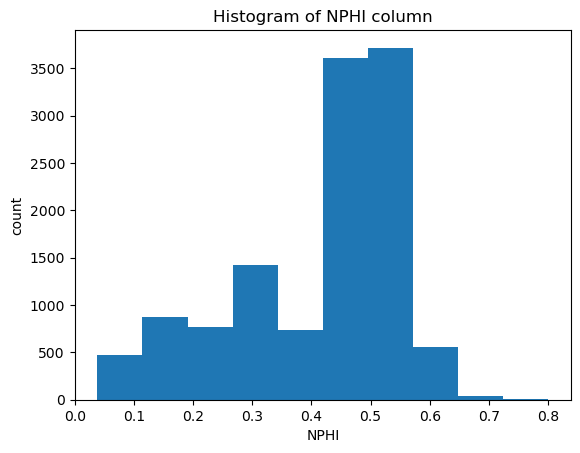

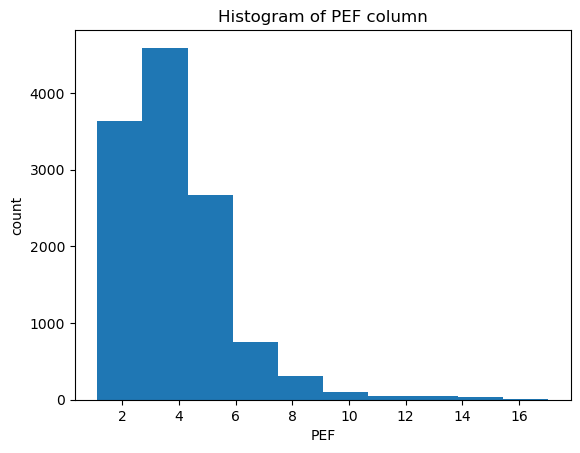

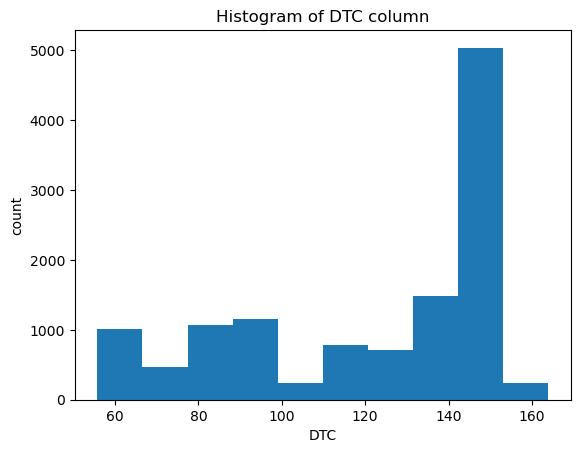

In [43]:
for col in data.columns:
    plt.hist(data[col])
    plt.title('Histogram of {} column'.format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

Preprocess the Data

SCALING

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
data["RHOB"] = std_scaler.fit_transform(data[["RHOB"]])
data["GR"] = min_max_scaler.fit_transform(data[["GR"]])
data["DEPTH_MD"] = std_scaler.fit_transform(data[["DEPTH_MD"]])
data["NPHI"] = std_scaler.fit_transform(data[["NPHI"]])
data["PEF"] = min_max_scaler.fit_transform(data[["PEF"]])
data["DTC"] = min_max_scaler.fit_transform(data[["DTC"]])

In [55]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,-1.491843,0.100848,-1.731605,2.523654,0.031750,0.851428
4239,-1.387067,0.111068,-1.731322,2.770744,0.032605,0.801002
4240,-1.320646,0.113479,-1.731038,2.524300,0.032655,0.762881
4241,-1.274390,0.111234,-1.730754,2.068584,0.031041,0.771576
4242,-1.335919,0.106141,-1.730470,1.617342,0.023785,0.818636


Apply Clustering Algorithms

In [58]:
from sklearn.cluster import KMeans

In [62]:
data.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [64]:
x = data[['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']]

In [80]:
wcss = []
for i in range(2,11):
  km = KMeans(n_clusters = i, n_init = 10)
  km.fit(x)
  css = km.inertia_ #wcss score
  wcss.append(css)

In [81]:
wcss

[10711.643830058312,
 7420.001099878497,
 5697.421128084801,
 4618.975777697376,
 3884.9715647655216,
 3243.3806589043998,
 2834.3900765534413,
 2620.811231277807,
 2417.938016683879]

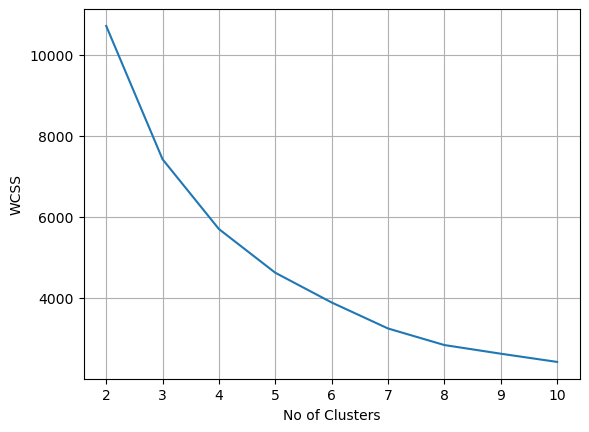

In [84]:
#Elbow Method
plt.plot(range(2,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.grid()

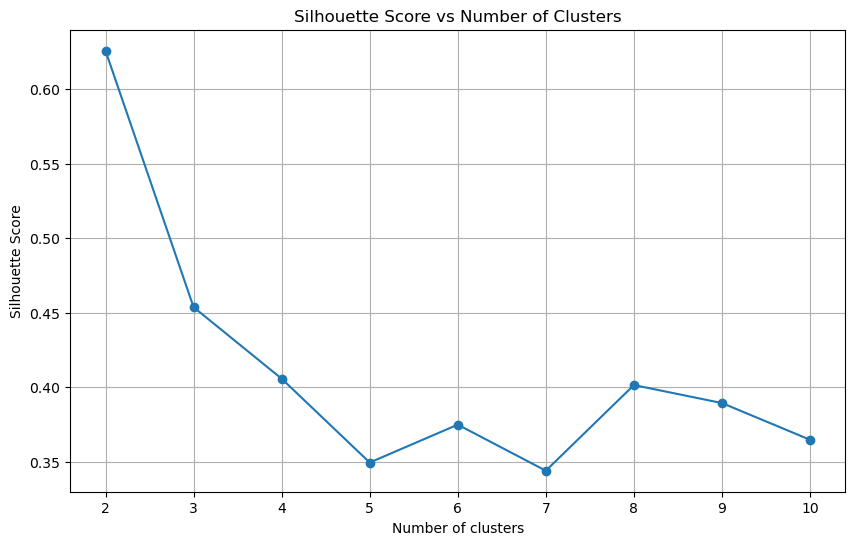

In [88]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# Try k from 2 to 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid()
plt.show()

In [92]:
km = KMeans(n_clusters = 2, n_init = 10)
km.fit(x)

KMeans(n_clusters=2, n_init=10)

In [94]:
cluster_labels = km.predict(x)

In [96]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [98]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,-1.491843,0.100848,-1.731605,2.523654,0.031750,0.851428
4239,-1.387067,0.111068,-1.731322,2.770744,0.032605,0.801002
4240,-1.320646,0.113479,-1.731038,2.524300,0.032655,0.762881
4241,-1.274390,0.111234,-1.730754,2.068584,0.031041,0.771576
4242,-1.335919,0.106141,-1.730470,1.617342,0.023785,0.818636


In [102]:
kmeans_silhouette = silhouette_score(x, cluster_labels)

In [104]:
kmeans_silhouette

0.6257798068668651

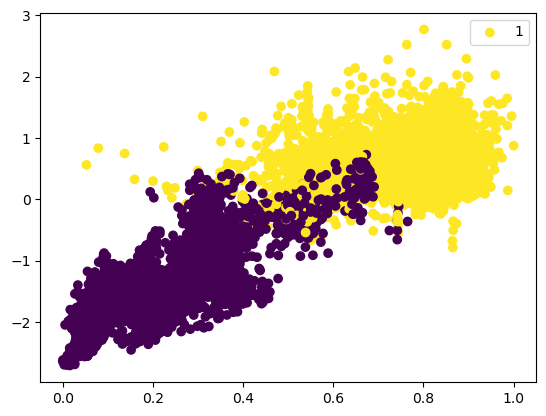

In [110]:
# Visualize the clusters using a scatter plot (use any two features)
plt.scatter(x["DTC"],x["NPHI"],c = cluster_labels)
plt.legend(cluster_labels)

#### Agglomerative Hierarchical Clustering

In [116]:
from sklearn.cluster import AgglomerativeClustering
# Apply Agglomerative clustering with the optimal number of clusters
agg_hc = AgglomerativeClustering(n_clusters = 2,
                             metric = 'euclidean',
                             linkage = 'ward')

y_hc_ward = agg_hc.fit_predict(x)

In [120]:
silhouette_score_agg_ward = silhouette_score(x,y_hc_ward)

In [122]:
silhouette_score_agg_ward

0.6221509676286917

In [124]:
agg_hc = AgglomerativeClustering(n_clusters = 2,
                             metric = 'euclidean',
                             linkage = 'complete')

In [126]:
y_hc_complete = agg_hc.fit_predict(x)

In [130]:
silhouette_score_agg_complete = silhouette_score(x,y_hc_complete)
silhouette_score_agg_complete

0.568013240513604

In [138]:
agg_hc = AgglomerativeClustering(n_clusters = 2,
                             metric = 'euclidean',
                             linkage = 'average')

y_hc_average = agg_hc.fit_predict(x)

In [140]:
silhouette_score_agg_average = silhouette_score(x,y_hc_average)
silhouette_score_agg_average

0.623793416222584

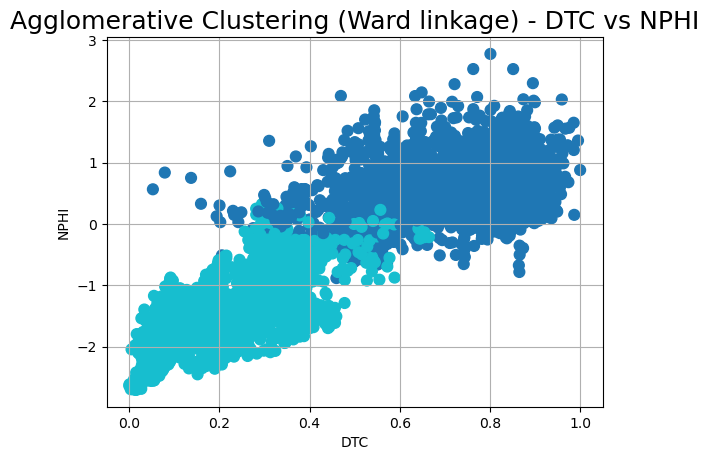

In [146]:
plt.scatter(x["DTC"], x["NPHI"], c=y_hc_ward, cmap='tab10', s=60)
plt.title("Agglomerative Clustering (Ward linkage) - DTC vs NPHI", fontsize=18)
plt.xlabel("DTC")
plt.ylabel("NPHI")
plt.grid(True)
plt.show()

### DBSCAN

In [153]:
from sklearn.cluster import DBSCAN
results = []
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(x)
        
        if len(set(labels)) > 1:
            score = silhouette_score(x, labels)
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette_score': score,
                'clusters_found': len(set(labels)) - (1 if -1 in labels else 0)
            })
        else:
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette_score': None,
                'clusters_found': len(set(labels)) - (1 if -1 in labels else 0)
            })

In [155]:
results_df = pd.DataFrame(results)
print(results_df)

    eps  min_samples  silhouette_score  clusters_found
0   0.1            5         -0.404186              60
1   0.1           10         -0.177070              20
2   0.1           15         -0.115449              15
3   0.2            5         -0.037422              11
4   0.2           10         -0.017518               8
5   0.2           15          0.107063               9
6   0.3            5          0.151348               6
7   0.3           10          0.486620               2
8   0.3           15          0.379581               3
9   0.4            5          0.421987               3
10  0.4           10          0.529497               2
11  0.4           15          0.520688               2
12  0.5            5          0.000819               2
13  0.5           10          0.246478               1
14  0.5           15          0.254159               1


In [157]:
results_df.dropna().sort_values(by="silhouette_score", ascending=False)

,eps,min_samples,silhouette_score,clusters_found
10,0.4,10,0.529497,2
11,0.4,15,0.520688,2
7,0.3,10,0.486620,2
9,0.4,5,0.421987,3
8,0.3,15,0.379581,3
14,0.5,15,0.254159,1
13,0.5,10,0.246478,1
6,0.3,5,0.151348,6
5,0.2,15,0.107063,9
12,0.5,5,0.000819,2


In [171]:
db = DBSCAN(eps=0.4, min_samples=10)
db.fit(x)
labels = db.labels_

In [173]:
# silhouette score
dbscan_silhouette = silhouette_score(x, labels)
print("Silhouette Score:", dbscan_silhouette)

Silhouette Score: 0.5294967048539786


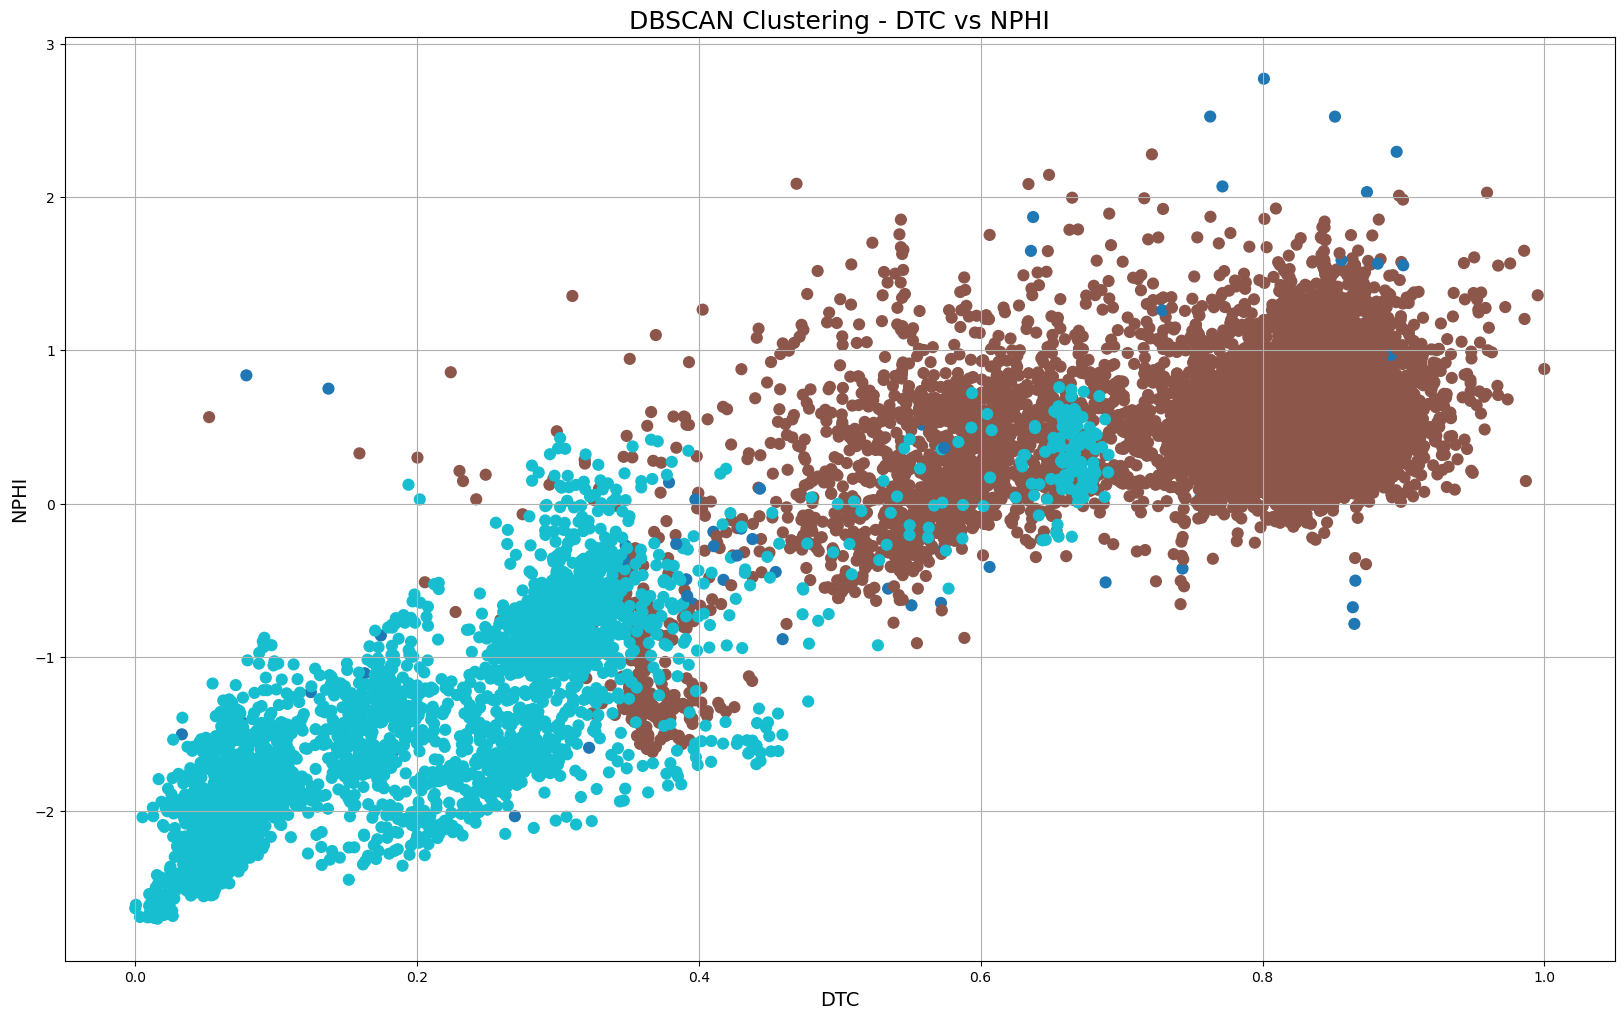

In [175]:
plt.figure(figsize=(20, 12))
plt.scatter(x["DTC"], x["NPHI"], c=labels, cmap='tab10', s=60)

plt.title("DBSCAN Clustering - DTC vs NPHI", fontsize=18)
plt.xlabel("DTC", fontsize=14)
plt.ylabel("NPHI", fontsize=14)
plt.grid(True)

In [177]:
def compare_clustering_algorithms(X):
    results = []

    # --- KMeans with k=2 to k=6 ---
    for k in range(2, 7):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        wcss = kmeans.inertia_
        results.append({
            "Algorithm": f"KMeans (k={k})",
            "Clusters": k,
            "Silhouette Score": round(score, 3),
            "WCSS": round(wcss, 2),
            "Notes": "-"
        })

    # --- Agglomerative Clustering with different linkage methods ---
    linkages = ["ward", "complete", "average"]

    for link in linkages:
        agg = AgglomerativeClustering(n_clusters=2, linkage=link)
        labels = agg.fit_predict(X)
        score = silhouette_score(X, labels)
        results.append({
            "Algorithm": f"Agglomerative ({link})",
            "Clusters": len(set(labels)),
            "Silhouette Score": round(score, 3),
            "WCSS": "N/A",
            "Notes": "-"
        })

    # --- DBSCAN ---
    db = DBSCAN(eps=0.3, min_samples=10)
    labels = db.fit_predict(X)

    # Count clusters excluding noise
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Filter out noise for silhouette
    mask = labels != -1
    if num_clusters > 1:
        score = silhouette_score(X[mask], labels[mask])
    else:
        score = None

    results.append({
        "Algorithm": "DBSCAN",
        "Clusters": num_clusters,
        "Silhouette Score": round(score, 3) if score else "N/A",
        "WCSS": "N/A",
        "Notes": "Noise detected" if -1 in labels else "-"
    })

    results_df = pd.DataFrame(results)
    return results_df

In [181]:
compare_clustering_algorithms(x)

,Algorithm,Clusters,Silhouette Score,WCSS,Notes
0,KMeans (k=2),2,0.626,10711.64,-
1,KMeans (k=3),3,0.454,7419.99,-
2,KMeans (k=4),4,0.406,5697.35,-
3,KMeans (k=5),5,0.406,4618.98,-
4,KMeans (k=6),6,0.374,3884.99,-
5,Agglomerative (ward),2,0.622,N/A,-
6,Agglomerative (complete),2,0.568,N/A,-
7,Agglomerative (average),2,0.624,N/A,-
8,DBSCAN,2,0.619,N/A,Noise detected


### Best CLustering is KMeans with n-clusters = 2
#### Silhouette Score = 0.626
#### WCSS = 10711.64